In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
train_path = '/content/drive/MyDrive/DATASET/TRAIN'
test_path = '/content/drive/MyDrive/DATASET/TEST'

In [ ]:
iv3 = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 0s 0us/step


In [ ]:
for layer in iv3.layers:
  layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/DATASET/TRAIN/*')

In [ ]:
len(folders)

5

In [ ]:
x = Flatten()(iv3.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=iv3.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255, 
    shear_range = 0.2, 
    zoom_range=0.2, 
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/DATASET/TRAIN',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 634 images belonging to 5 classes.


In [ ]:
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/DATASET/TEST',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 361 images belonging to 5 classes.


In [ ]:
history = model.fit_generator(
    training_set, 
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
40/40 [==============================] - 273s 7s/step - loss: 3.6255 - accuracy: 0.6703 - val_loss: 0.7321 - val_accuracy: 0.8864
Epoch 2/10
40/40 [==============================] - 31s 758ms/step - loss: 0.6806 - accuracy: 0.9132 - val_loss: 1.0872 - val_accuracy: 0.8698
Epoch 3/10
40/40 [==============================] - 31s 770ms/step - loss: 0.4607 - accuracy: 0.9290 - val_loss: 0.4743 - val_accuracy: 0.9501
Epoch 4/10
40/40 [==============================] - 30s 766ms/step - loss: 0.1300 - accuracy: 0.9763 - val_loss: 0.4674 - val_accuracy: 0.9474
Epoch 5/10
40/40 [==============================] - 31s 779ms/step - loss: 0.2623 - accuracy: 0.9653 - val_loss: 0.7174 - val_accuracy: 0.9307
Epoch 6/10
40/40 [==============================] - 31s 775ms/step - loss: 0.3270 - accuracy: 0.9558 - val_loss: 0.8573 - val_accuracy: 0.9003
Epoch 7/10
40/40 [==============================] - 30s 767ms/step - loss: 0.2701 - accuracy: 0.9527 - val_loss: 1.0552 - val_accuracy: 0.9030
E

In [ ]:
from keras.models import load_model
model.save('CNN_IV.h5')

To do predictions on the trained model I need to load the best saved model and pre-process the image and pass the image to the model for output.

from keras.preprocessing import imageimg = image.load_img("image.jpeg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)from keras.models import load_model
saved_model = load_model("CNN_VGG.h5")output = saved_model.predict(img)

In [ ]:
model.evaluate(training_set), model.evaluate(test_set)

23/23 [==============================] - 14s 591ms/step - loss: 0.3433 - accuracy: 0.9612


([0.08075962960720062, 0.988959014415741],
 [0.3433237075805664, 0.9612188339233398])

In [ ]:
y_val_org = []
for i in range( test_set.__len__() ):
    y_val_org.extend(
        test_set.__getitem__( i )[1] 
    )
y_val_org = np.array(y_val_org)
y_val_org = np.argmax(y_val_org, axis=1)

In [ ]:
y_val_org


array([0, 0, 1, 0, 3, 1, 4, 0, 0, 0, 3, 2, 1, 2, 2, 0, 2, 4, 3, 0, 3, 4,
       3, 4, 1, 2, 4, 2, 2, 2, 2, 1, 0, 4, 2, 1, 1, 0, 0, 2, 2, 4, 1, 3,
       3, 4, 4, 4, 3, 4, 3, 2, 1, 4, 2, 4, 2, 0, 4, 1, 2, 1, 2, 3, 3, 4,
       2, 0, 0, 1, 4, 3, 2, 3, 4, 3, 2, 1, 0, 0, 2, 3, 3, 0, 2, 4, 1, 1,
       3, 4, 2, 1, 4, 4, 3, 1, 0, 2, 2, 1, 3, 2, 2, 4, 3, 2, 4, 3, 1, 0,
       4, 3, 2, 2, 4, 0, 0, 3, 4, 0, 2, 4, 2, 0, 2, 0, 2, 4, 0, 2, 2, 0,
       3, 4, 0, 0, 4, 2, 1, 4, 4, 2, 1, 1, 1, 2, 2, 1, 3, 0, 2, 3, 3, 3,
       2, 2, 4, 4, 0, 0, 3, 3, 3, 1, 0, 2, 0, 2, 4, 4, 1, 4, 0, 2, 4, 4,
       0, 0, 0, 1, 3, 1, 4, 1, 4, 0, 4, 2, 2, 1, 0, 0, 1, 4, 0, 0, 4, 1,
       0, 3, 2, 0, 2, 1, 0, 4, 0, 0, 2, 3, 4, 2, 1, 0, 3, 4, 3, 4, 2, 2,
       3, 4, 4, 3, 0, 4, 1, 4, 2, 2, 3, 1, 0, 4, 2, 1, 3, 0, 1, 4, 0, 1,
       4, 3, 3, 1, 1, 2, 2, 0, 1, 2, 4, 0, 0, 4, 2, 0, 2, 3, 0, 1, 1, 2,
       1, 2, 0, 1, 0, 3, 4, 0, 0, 4, 0, 0, 3, 0, 0, 4, 3, 1, 2, 2, 3, 3,
       2, 0, 2, 4, 2, 1, 4, 4, 0, 4, 2, 2, 1, 4, 2,

In [ ]:
ypreds = model.predict(test_set)
ypreds = np.argmax(ypreds, axis=1)
ypreds

array([0, 0, 1, 0, 3, 1, 1, 0, 0, 0, 3, 2, 1, 2, 2, 0, 2, 4, 3, 0, 3, 4,
       3, 4, 1, 2, 4, 2, 2, 2, 2, 1, 0, 4, 2, 1, 1, 0, 0, 2, 2, 4, 1, 3,
       3, 3, 4, 4, 3, 4, 3, 2, 1, 4, 2, 4, 2, 0, 4, 1, 2, 1, 2, 3, 3, 4,
       2, 0, 0, 1, 4, 3, 2, 3, 4, 3, 2, 1, 0, 0, 2, 3, 3, 0, 2, 4, 1, 1,
       3, 4, 2, 1, 4, 4, 3, 1, 0, 2, 2, 1, 3, 2, 2, 1, 3, 2, 4, 3, 1, 0,
       4, 3, 2, 2, 4, 0, 0, 3, 4, 0, 2, 4, 2, 0, 2, 0, 2, 4, 0, 2, 2, 0,
       3, 4, 0, 0, 4, 2, 1, 4, 3, 2, 1, 1, 1, 2, 2, 1, 3, 0, 2, 4, 3, 3,
       2, 4, 4, 4, 0, 0, 3, 3, 3, 1, 0, 4, 0, 2, 4, 4, 1, 4, 4, 2, 4, 4,
       0, 0, 0, 2, 3, 4, 4, 1, 4, 0, 4, 2, 2, 1, 0, 0, 1, 4, 0, 0, 4, 1,
       0, 3, 2, 0, 2, 2, 0, 4, 0, 0, 2, 3, 4, 2, 1, 0, 3, 4, 4, 4, 2, 2,
       3, 4, 2, 3, 0, 4, 0, 4, 2, 2, 3, 1, 0, 4, 2, 1, 3, 0, 1, 4, 0, 1,
       4, 3, 4, 1, 4, 2, 2, 0, 1, 2, 4, 0, 0, 4, 2, 0, 2, 3, 0, 1, 1, 2,
       4, 2, 0, 1, 0, 3, 4, 0, 0, 4, 0, 0, 3, 0, 0, 4, 3, 1, 2, 2, 3, 3,
       2, 0, 2, 4, 2, 1, 4, 4, 0, 4, 2, 2, 4, 4, 2,

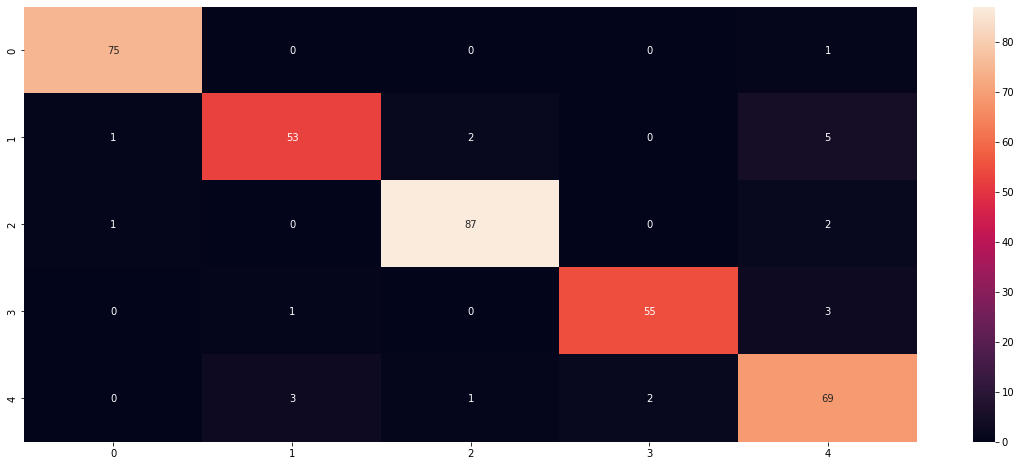




              precision    recall  f1-score   support

           0       0.97      0.99      0.98        76
           1       0.93      0.87      0.90        61
           2       0.97      0.97      0.97        90
           3       0.96      0.93      0.95        59
           4       0.86      0.92      0.89        75

    accuracy                           0.94       361
   macro avg       0.94      0.93      0.94       361
weighted avg       0.94      0.94      0.94       361



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cf_matrix = confusion_matrix(y_val_org, ypreds)

plt.figure(figsize=(20,8))
ax = sns.heatmap(cf_matrix, annot=True, fmt='g')
plt.show()

print("\n\n")
print(classification_report(y_val_org, ypreds))